In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | lulea
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | verrettes
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | katobu
Processing Record 13 of Set 1 | kiruna
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | sabang
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | asau
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | burdinne
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | la sarre
Processing Record 22 of Set 1 | ovalle
Processing Record 23 of Set 1 | mar del plata
P

Processing Record 36 of Set 4 | maceio
Processing Record 37 of Set 4 | alofi
Processing Record 38 of Set 4 | bardiyah
Processing Record 39 of Set 4 | bantou
Processing Record 40 of Set 4 | itarema
Processing Record 41 of Set 4 | myitkyina
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | sobolevo
Processing Record 45 of Set 4 | ketchikan
Processing Record 46 of Set 4 | sangar
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | takoradi
Processing Record 49 of Set 4 | zholymbet
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | outjo
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | mayo
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | iisalmi
Processing Record 7 of Set 5 | straumen
Processing Record 8 of Set 5 | arandis
Processing Record 9 of Set 5 | tebingtinggi
Processing Record 10 of Set 5 | abu dhabi
Pr

Processing Record 28 of Set 8 | sampit
Processing Record 29 of Set 8 | allanmyo
City not found. Skipping...
Processing Record 30 of Set 8 | reitz
Processing Record 31 of Set 8 | necochea
Processing Record 32 of Set 8 | linjiang
Processing Record 33 of Set 8 | bargal
City not found. Skipping...
Processing Record 34 of Set 8 | klaksvik
Processing Record 35 of Set 8 | abatskoye
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | maniitsoq
Processing Record 39 of Set 8 | hendijan
City not found. Skipping...
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | tshikapa
Processing Record 42 of Set 8 | ulladulla
Processing Record 43 of Set 8 | yar-sale
Processing Record 44 of Set 8 | filingue
Processing Record 45 of Set 8 | warqla
City not found. Skipping...
Processing Record 46 of Set 8 | turukhansk
Processing Record 47 of Set 8 | tiarei
Processing Record 48 of Set 8 | siverskiy
Processing Record 49 of Set 8 | luga

Processing Record 14 of Set 12 | whyalla
Processing Record 15 of Set 12 | coihaique
Processing Record 16 of Set 12 | hit
Processing Record 17 of Set 12 | davenda
Processing Record 18 of Set 12 | angra
City not found. Skipping...
Processing Record 19 of Set 12 | nizhniy tsasuchey
Processing Record 20 of Set 12 | oranjestad
Processing Record 21 of Set 12 | floriano
Processing Record 22 of Set 12 | kachiry
Processing Record 23 of Set 12 | flin flon
Processing Record 24 of Set 12 | anchorage
Processing Record 25 of Set 12 | salme
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set 12 | viligili
City not found. Skipping...
Processing Record 28 of Set 12 | jumla
Processing Record 29 of Set 12 | varhaug
Processing Record 30 of Set 12 | bela
Processing Record 31 of Set 12 | labuan
Processing Record 32 of Set 12 | tottori
Processing Record 33 of Set 12 | selty
Processing Record 34 of Set 12 | kavaratti
Processing Record 35 of Set 12 | te anau
Processing Record 36 of Set 12 | tairu

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,61.11,66,75,9.22,AU,2022-02-11 22:06:30
1,Lulea,65.5842,22.1547,6.87,92,13,2.30,SE,2022-02-11 22:09:24
2,Cherskiy,68.7500,161.3000,-37.19,100,90,6.31,RU,2022-02-11 22:09:24
3,Atuona,-9.8000,-139.0333,77.86,76,5,13.18,PF,2022-02-11 22:09:24
4,Castro,-24.7911,-50.0119,71.58,61,65,8.90,BR,2022-02-11 22:09:25
5,Verrettes,19.0500,-72.4667,89.19,56,2,5.70,HT,2022-02-11 22:09:25
6,Port Hedland,-20.3167,118.5667,82.45,89,60,5.75,AU,2022-02-11 22:09:25
7,Jamestown,42.0970,-79.2353,45.52,52,100,20.71,US,2022-02-11 22:09:26
8,Georgetown,5.4112,100.3354,77.90,85,20,0.00,MY,2022-02-11 22:09:26
9,Tuktoyaktuk,69.4541,-133.0374,-24.23,100,52,5.03,CA,2022-02-11 22:09:26


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-02-11 22:06:30,-42.8794,147.3294,61.11,66,75,9.22
1,Lulea,SE,2022-02-11 22:09:24,65.5842,22.1547,6.87,92,13,2.30
2,Cherskiy,RU,2022-02-11 22:09:24,68.7500,161.3000,-37.19,100,90,6.31
3,Atuona,PF,2022-02-11 22:09:24,-9.8000,-139.0333,77.86,76,5,13.18
4,Castro,BR,2022-02-11 22:09:25,-24.7911,-50.0119,71.58,61,65,8.90
5,Verrettes,HT,2022-02-11 22:09:25,19.0500,-72.4667,89.19,56,2,5.70
6,Port Hedland,AU,2022-02-11 22:09:25,-20.3167,118.5667,82.45,89,60,5.75
7,Jamestown,US,2022-02-11 22:09:26,42.0970,-79.2353,45.52,52,100,20.71
8,Georgetown,MY,2022-02-11 22:09:26,5.4112,100.3354,77.90,85,20,0.00
9,Tuktoyaktuk,CA,2022-02-11 22:09:26,69.4541,-133.0374,-24.23,100,52,5.03


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

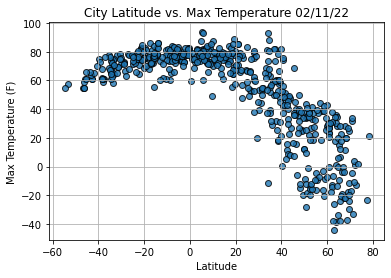

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

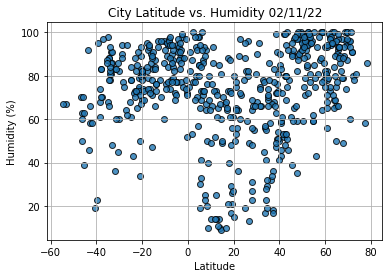

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

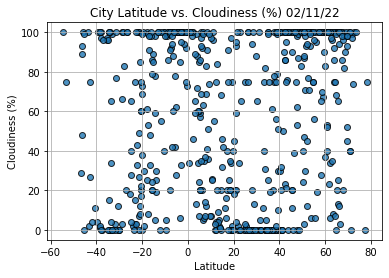

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

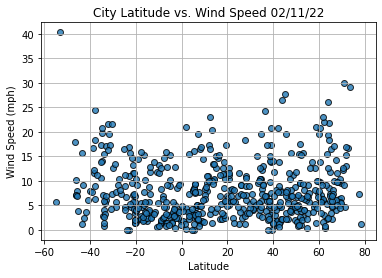

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()